# 1 - Import the necessary libraries

In [86]:
import numpy as np
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

#2 - Import Dataset
Import the dataset from this [address](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset).


In [87]:
path = kagglehub.dataset_download("fronkongames/steam-games-dataset")

In [88]:
csv_file_path = os.path.join(path, 'games.csv')
games = pd.read_csv(csv_file_path)
cols = games.columns.tolist()
new_cols = cols[1:7] + ['Discount', 'DLC Count'] + cols[8:]
games.columns = new_cols
display(games.head(10))

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC Count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,0,1,"TD Worlds is a dynamic, highly strategical gam...","['English', 'Russian', 'Danish']",...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,0,When the Roman people honored a simple warrior...,"['English', 'German']",...,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
320150,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,0,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,ONE MOR

# Definição de tipos

In [89]:
print(games.shape)
games.dtypes

(111452, 39)


,0
Name,object
Release date,object
Estimated owners,object
Peak CCU,int64
Required age,int64
Price,float64
Discount,int64
DLC Count,int64
About the game,object
Supported languages,object


In [90]:
## Converter o range de owner em um valor médio entre o inferior e superior e transformar em int
owners = games['Estimated owners'].str.split('-', expand=True).astype(int)
games['Estimated owners'] = ((owners[0] + owners[1]) / 2).astype(int)

In [91]:
## Estimar receita com base no número de owners e preço
games['Estimated revenue'] = games['Estimated owners'] * games['Price']

In [92]:
## Converter a coluna de data para um objeto datetime

games['Release date'] = pd.to_datetime(games['Release date'], format='mixed', dayfirst=False)

In [93]:
## Contar número de idiomas

games['Supported languages count'] = games['Supported languages'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
display(games[['Supported languages', 'Supported languages count']].head())

,Supported languages,Supported languages count
20200,['English'],1
655370,"['English', 'French', 'Italian', 'German', 'Sp...",10
1732930,"['English', 'Portuguese - Brazil']",2
1355720,"['English', 'French', 'Italian', 'German', 'Sp...",11
1139950,"['English', 'Spanish - Spain']",2


In [94]:
## Contar número de idiomas

games['Tags count'] = games['Tags'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
display(games[['Tags', 'Tags count']].head())

,Tags,Tags count
20200,"Indie,Casual,Sports,Bowling",4
655370,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",20
1732930,NaN,0
1355720,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",19
1139950,"Indie,Adventure,Nudity,Violent,Sexual Content,...",6


In [95]:
## Identificar se o jogo é self-published, quando o developer e publisher são os mesmos

games['Self-published'] = games['Developers'] == games['Publishers']

## Categorização dos estúdos de desenvolvimento e publishers

dev_cat = games['Developers'].astype('category')
pub_cat = games['Publishers'].astype('category')
name_cat = games['Name'].astype('category')
genres_cat = games['Genres'].astype('category')
tags_cat = games['Tags'].astype('category')

games['Developers'] = dev_cat.cat.codes
games['Publishers'] = pub_cat.cat.codes
games['Name'] = name_cat.cat.codes
games['Genres'] = genres_cat.cat.codes
games['Tags'] = tags_cat.cat.codes
display(games[['Name','Developers','Publishers','Self-published']])

,Name,Developers,Publishers,Self-published
20200,35527,39448,34681,True
655370,95783,44334,50038,False
1732930,46734,8722,7675,True
1355720,40645,37421,32909,True
1139950,97022,54590,48030,True
...,...,...,...,...
3600970,65178,56461,49732,True
3543710,1273,22769,20062,True
3265370,57947,46918,41346,False
3423620,2600,1542,1435,True


In [96]:
games.dtypes

,0
Name,int32
Release date,datetime64[ns]
Estimated owners,int64
Peak CCU,int64
Required age,int64
Price,float64
Discount,int64
DLC Count,int64
About the game,object
Supported languages,object


In [97]:
## Remover colunas com dados indesejados

games.drop(columns=['Notes', 'Movies', 'Screenshots', 'Website', 'Support url', 'Support email', 'Header image', 'About the game', 'Metacritic url', 'Reviews', 'Supported languages', 'Full audio languages', 'Categories'], inplace=True)
games.dtypes

,0
Name,int32
Release date,datetime64[ns]
Estimated owners,int64
Peak CCU,int64
Required age,int64
Price,float64
Discount,int64
DLC Count,int64
Windows,bool
Mac,bool


In [98]:
# normalizando min-max
numeric_cols = games.select_dtypes(include=np.number)
games_norm = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())
print(games_norm.head())

             Name  Estimated owners  Peak CCU  Required age    Price  \
20200    0.322030          0.000067       0.0           0.0  0.01999   
655370   0.868199          0.000067       0.0           0.0  0.00099   
1732930  0.423612          0.000067       0.0           0.0  0.00499   
1355720  0.368421          0.000067       0.0           0.0  0.00599   
1139950  0.879429          0.000067       0.0           0.0  0.00000   

         Discount  DLC Count  Metacritic score  User score      Positive  ...  \
20200         0.0        0.0               0.0         0.0  1.040868e-06  ...   
655370        0.0        0.0               0.0         0.0  9.194334e-06  ...   
1732930       0.0        0.0               0.0         0.0  0.000000e+00  ...   
1355720       0.0        0.0               0.0         0.0  5.204340e-07  ...   
1139950       0.0        0.0               0.0         0.0  8.673900e-06  ...   

         Average playtime two weeks  Median playtime forever  \
20200           

Lower Whisker: 1
Upper Whisker: 6.0
Shape of original data: (111452, 30)
Shape of filtered data: (93513, 30)


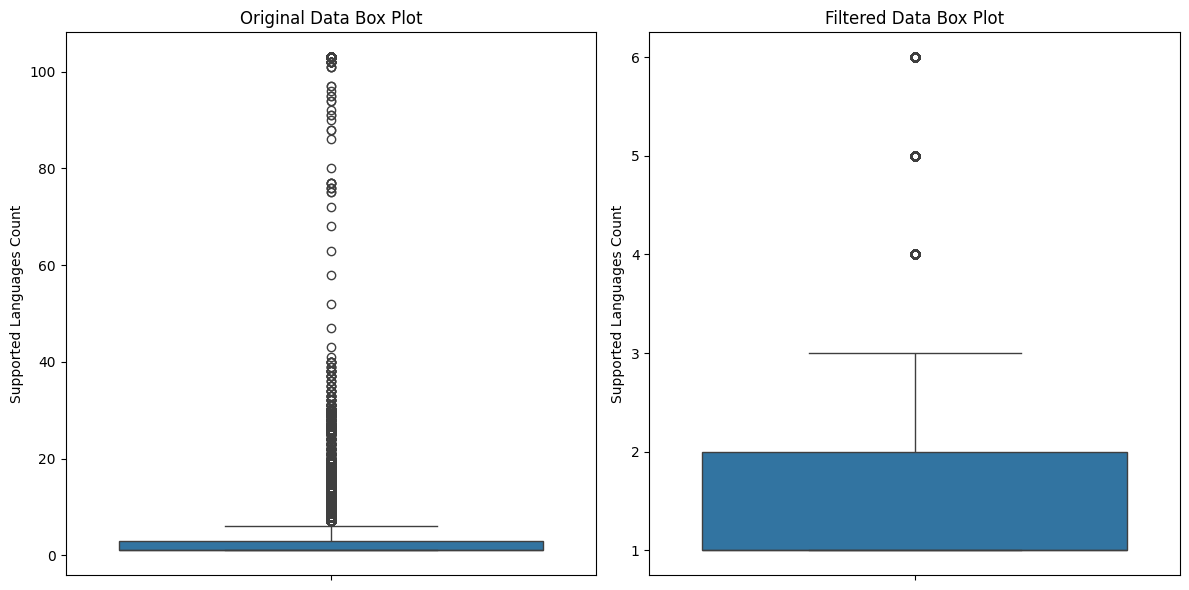

In [99]:
# Remover outliers do número de idiomas

Q1 = games['Supported languages count'].quantile(0.25)
Q3 = games['Supported languages count'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

lower_whisker = max(lower_whisker, games['Supported languages count'].min())
upper_whisker = min(upper_whisker, games['Supported languages count'].max())

print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

filtered_games = games[(games['Supported languages count'] >= lower_whisker) & (games['Supported languages count'] <= upper_whisker)].copy()

print("Shape of original data:", games.shape)
print("Shape of filtered data:", filtered_games.shape)

plt.figure(figsize=(12, 6))

# Box plot for original data
plt.subplot(1, 2, 1)
sns.boxplot(data=games, y='Supported languages count')
plt.title('Original Data Box Plot')
plt.ylabel('Supported Languages Count')

# Box plot for filtered data
plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_games, y='Supported languages count')
plt.title('Filtered Data Box Plot')
plt.ylabel('Supported Languages Count')

plt.tight_layout()
plt.show()

#Brainstorm de possíveis Insights


1. Relação entre categoria e popularidade do jogo
2. Relação entre número de línguas e popularidade do jogo



# Hipótese 1 - Jogos com mais idiomas possuem maior alcance (maior número de owners)

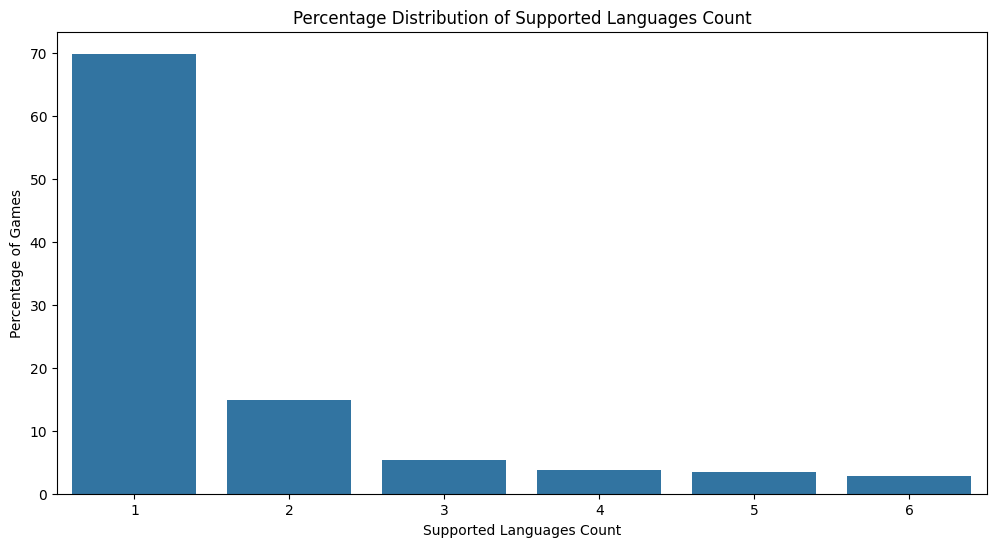

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of games for each supported language count
language_counts = filtered_games['Supported languages count'].value_counts(normalize=True) * 100
language_counts = language_counts.sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Percentage Distribution of Supported Languages Count')
plt.xlabel('Supported Languages Count')
plt.ylabel('Percentage of Games')
plt.xticks(rotation=0)
plt.show()

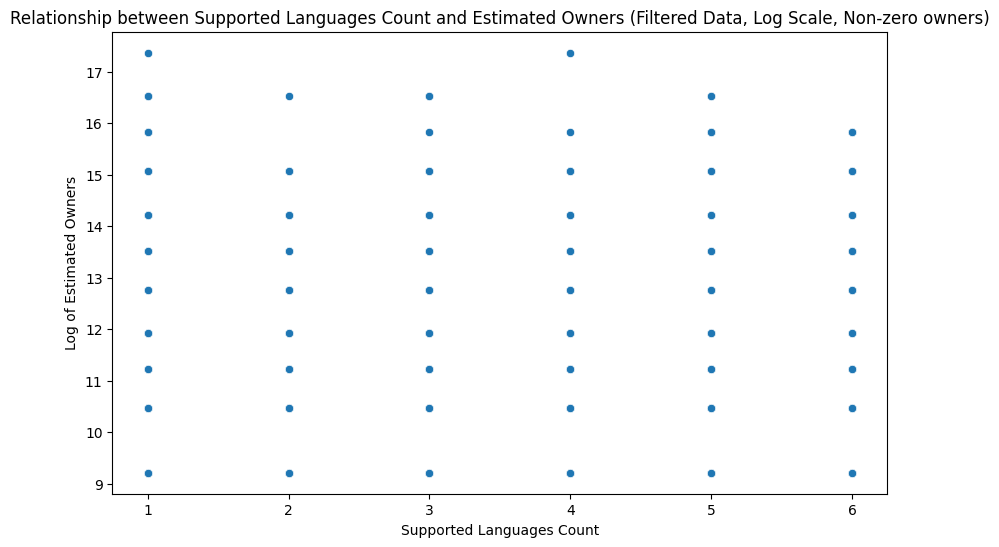

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out games with 0 estimated owners
filtered_games_nonzero_owners = filtered_games[filtered_games['Estimated owners'] > 0].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_games_nonzero_owners, x='Supported languages count', y=np.log1p(filtered_games_nonzero_owners['Estimated owners']))
plt.title('Relationship between Supported Languages Count and Estimated Owners (Filtered Data, Log Scale, Non-zero owners)')
plt.xlabel('Supported Languages Count')
plt.ylabel('Log of Estimated Owners')
plt.show()

A partir do gráfico acima, verificamos uma distribuição homogênea das amostras entre todo o espaço. Dessa forma, podemos afirmar que não há correlação entre o número de idiomas disponíveis no jogo e seu sucesso de público

# Hipótese 2 - Existe uma combinação de Tags mais lucrativa

,Tags,Estimated revenue,count,label
0,46127,4.499250e+09,1,"Mythology,Action RPG,Action,RPG,Souls-like,Com..."
1,45254,2.999250e+09,1,"Massively Multiplayer,Open World,MMORPG,RPG,Ad..."
2,58822,2.099650e+09,1,"Souls-like,Relaxing,Dark Fantasy,RPG,Difficult..."
3,63708,1.399650e+09,1,"Survival,Crafting,Multiplayer,Open World,Open ..."
4,28980,8.998500e+08,1,"Cyberpunk,Open World,RPG,Nudity,Singleplayer,S..."
5,45464,7.498500e+08,1,"Medieval,Strategy,Open World,RPG,War,Sandbox,M..."
6,34351,6.996500e+08,1,"FPS,Hero Shooter,Multiplayer,Tactical,Shooter,..."
7,46617,6.996500e+08,1,"Open World Survival Craft,Survival,Online Co-O..."
8,46744,5.998500e+08,1,"Open World,RPG,Story Rich,Atmospheric,Mature,F..."
9,58929,5.249250e+08,1,"Space,Singleplayer,Open World,RPG,Sci-fi,Explo..."


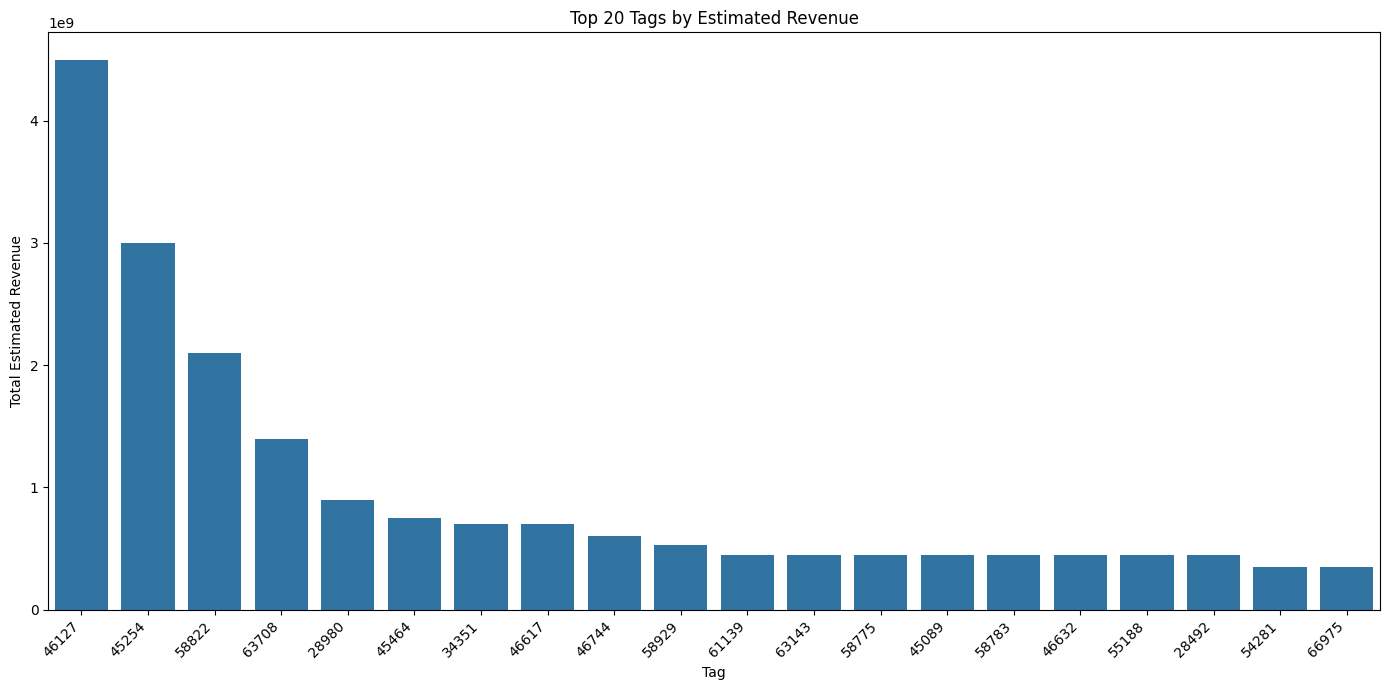

In [105]:
# Group by Tags and sum the estimated revenue
tag_revenue = games.groupby('Tags').agg(
    {'Estimated revenue': 'sum'}
).sort_values(by='Estimated revenue', ascending=False)

tag_revenue = tag_revenue[tag_revenue.index > 0]

tag_revenue['count'] = games.groupby('Tags').size()

# Select the top N tags for plotting (optional, to avoid too many bars)

top_n = 20  # You can adjust this number
tag_revenue_top_n = tag_revenue.head(top_n)

# Get the actual tag names based on the categorical codes from tags_cat
tag_names = tags_cat.cat.categories
x_labels = [tag_names[code] if code != -1 else 'Unknown' for code in tag_revenue_top_n.index]

tag_revenue_top_n = pd.DataFrame(tag_revenue_top_n)
tag_revenue_top_n.reset_index(inplace=True, drop=False)
tag_revenue_top_n['label'] = x_labels
display(tag_revenue_top_n.head(10))

plt.figure(figsize=(14, 7))
sns.barplot(x=tag_revenue_top_n.index, y=tag_revenue_top_n['Estimated revenue'])
plt.title(f'Top {top_n} Tags by Estimated Revenue')
plt.xlabel('Tag')
plt.ylabel('Total Estimated Revenue')
plt.xticks(ticks=range(len(x_labels)), labels=tag_revenue_top_n['Tags'], rotation=45, ha='right') # Use 'label' for x-axis labels
plt.tight_layout()
plt.show()

Percebemos que a contagem do número de jogos com a combinação específica de tags é de 1. Isso significa que a combinação de tags é diversa o suficiente para ser única para a maioria dos jogos relevantes. Assim, uma outra abordagem se faz necessária, na qual ao invés da combinação de tags, analisar as tags individualmente.